<a href="https://colab.research.google.com/github/practice-grounds-wpaarth24/CNN/blob/main/CNN_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import urllib.request

url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"
urllib.request.urlretrieve(url, "pizza_steak.zip")


('pizza_steak.zip', <http.client.HTTPMessage at 0x19b018811c0>)

In [22]:
import zipfile

zipp = zipfile.ZipFile("pizza_steak.zip")  # Open the zip file
zipp.extractall()  # Extract the contents
zipp.close()  # Close the file


In [3]:
import os
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [5]:
def random_Image(direc, classs):
  folder = direc + classs
  img_path = random.choice(os.listdir(folder))
  img = mpimg.imread(folder + "/" + img_path)
  plt.imshow(img)
  plt.axis("off")
  plt.show()
  return img

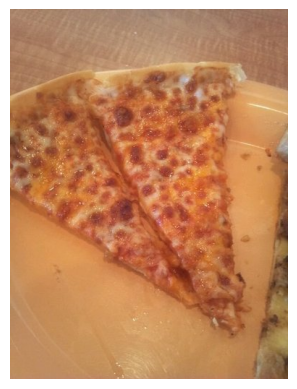

In [6]:
img = random_Image("pizza_steak/train/", "pizza")

#**Steps to build CNN Model**
* Load Images
* Preprocess images
* Build CNN model to find patterns
* Compile and Fit CNN model



In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_dir = "pizza_steak/train"
valid_dir = "pizza_steak/test"

#Preprocess data to get all pixel values between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)



In [9]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=25,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.


In [10]:
1500/25

60.0

In [12]:
valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               batch_size=25,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

Found 500 images belonging to 2 classes.


In [13]:
500/25


20.0

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
#Compilation
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [17]:
#Fitting
history = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 251ms/step - accuracy: 0.7876 - loss: 0.4354 - val_accuracy: 0.8440 - val_loss: 0.3599
Epoch 2/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - accuracy: 0.8282 - loss: 0.3961 - val_accuracy: 0.8480 - val_loss: 0.3521
Epoch 3/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 213ms/step - accuracy: 0.8397 - loss: 0.4009 - val_accuracy: 0.8780 - val_loss: 0.2848
Epoch 4/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 200ms/step - accuracy: 0.8562 - loss: 0.3387 - val_accuracy: 0.8540 - val_loss: 0.3148
Epoch 5/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 217ms/step - accuracy: 0.9018 - loss: 0.2537 - val_accuracy: 0.8600 - val_loss: 0.3181


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [20]:
model.evaluate(valid_data)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.8827 - loss: 0.2989


[0.31805747747421265, 0.8600000143051147]